**Example**

The following example illustrates the superposition of two harmonic signals $x_\text{A}(t) = A \cdot \cos(\omega_\text{A} t)$ and  $x_\text{B}(t) = B \cdot \cos(\omega_\text{B} t)$ with weights $A$, $B$ and angular frequencies $\omega_\text{A}$ and $\omega_\text{B}$.

In [12]:
import sympy as sym

sym.init_printing()

t,omegaA ,omegaB, A, B, a, tau= sym.symbols("t omega_A omega_B A B a tau", real = True)
x1 = A*sym.cos(omegaA*t)+B*sym.sin(omegaB*t)
x1

A⋅cos(ω_A⋅t) + B⋅sin(ω_B⋅t)

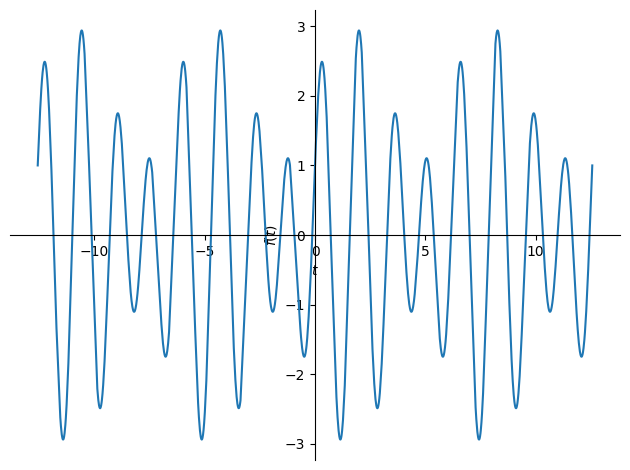

In [13]:
sym.plot(x1.subs({A:1,B:2,omegaA:3,omegaB:4}),(t,-4*sym.pi,4*sym.pi))

**Example**

In order to illustrate the temporal shifting of signals, the construction of a staircase signal by a superposition of shifted [rectangular signals](standard_signals.ipynb#Rectangular-Signal) is considered

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}

In [14]:
class rect(sym.Function):

  @classmethod
  def eval(cls,arg):
    return sym.Heaviside(arg+1/2)-sym.Heaviside(arg-1/2)

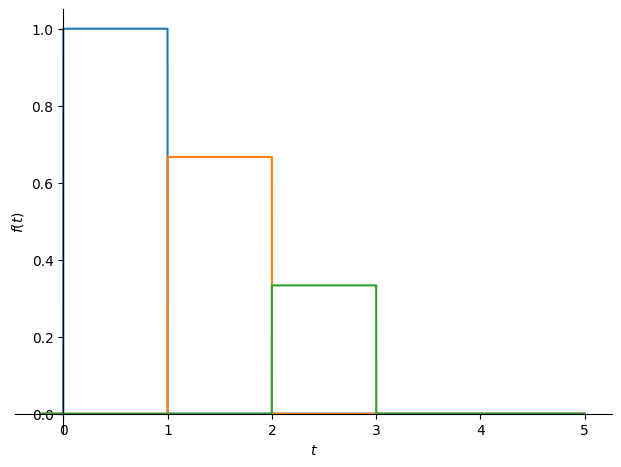

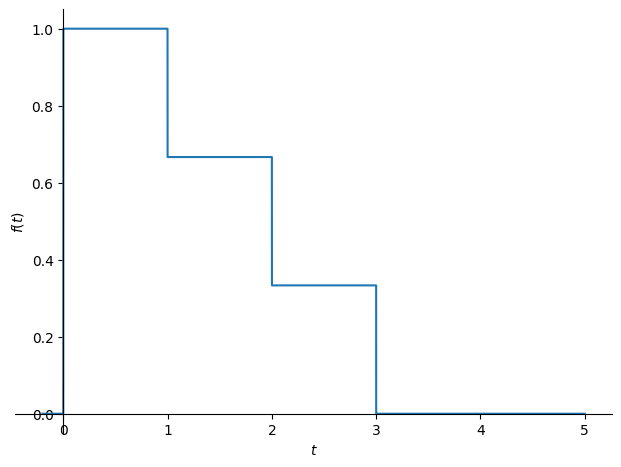

In [16]:
sgn1 = rect(t-1/2)
sgn2 = 2/3*rect(t-3/2)
sgn3 = 1/3*rect(t-5/2)

x2 = sgn1 + sgn2 + sgn3

sym.plot(sgn1,sgn2,sgn3,(t,-0.2,5))
sym.plot(x2,(t,-0.2,5))

**Exercise**

* Add another step to the beginning of the staircase signal by modifying above example.

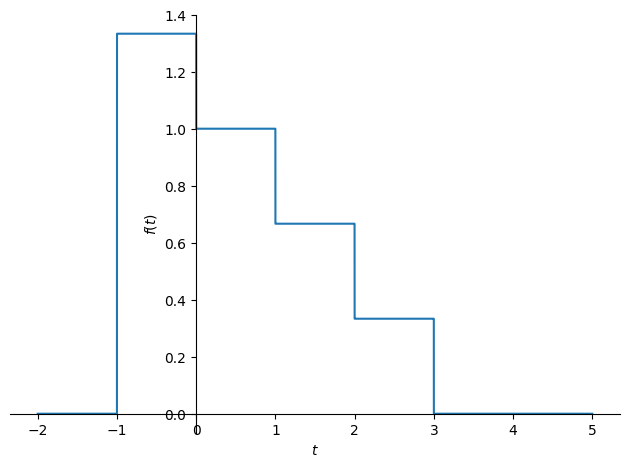

In [20]:
sgn4 = 4/3*rect(t+1/2)
e1 = sgn4 +x2

sym.plot(e1,(t,-2,5))

**Example**

The following example illustrates the temporal scaling of the staircase signal $y(t) = x(a \cdot t)$ introduced in the previous example. The original $x(t)$ is plotted in gray, the scaled signal $y(t)$ in blue. Here stretching is realized, such that $y(t)$ is twice as long as $x(t)$.

In [21]:
y = x2.subs(t,a*t)
y

θ(a⋅t) - 0.333333333333333⋅θ(a⋅t - 3.0) - 0.333333333333333⋅θ(a⋅t - 2.0) - 0.3
33333333333333⋅θ(a⋅t - 1.0)

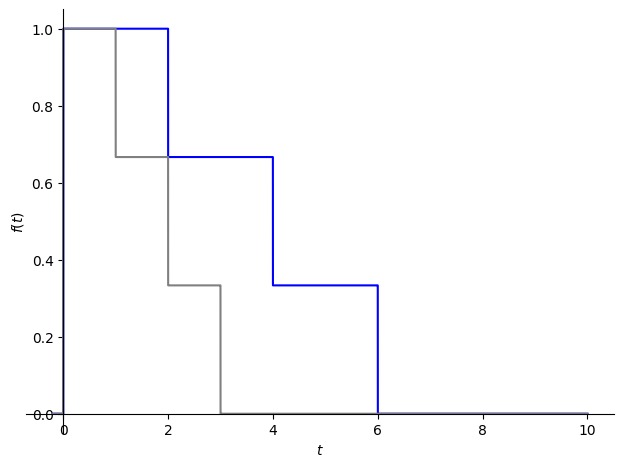

In [34]:
graph1 = sym.plot(y.subs(a,1/2),(t,-0.2,10),line_color = 'blue',show = False)
graph2 = sym.plot(x2,(t,-0.2,10),line_color = 'gray',show = False)
graph1.extend(graph2)
graph1.show()

**Exercise**

* Modify above example such that the signal is compressed.
* Modify above example such that the signal is scaled and time reversed. What scaling factors `a` lead to  stretching/compression in this context?

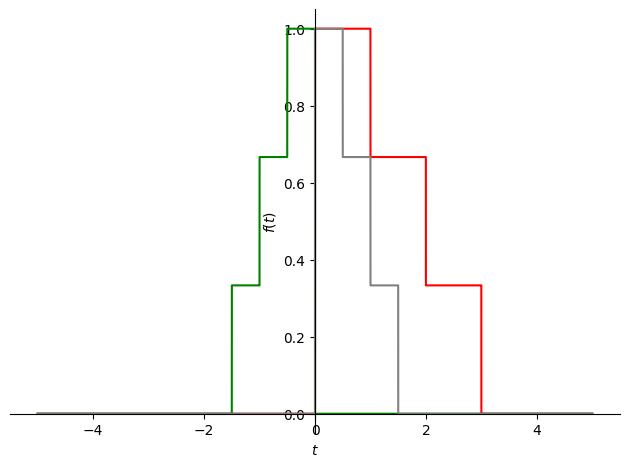

In [30]:
#Comprimos entonces tanto en el eje x sea la mitad

graph0 = sym.plot(y.subs(a,-2),(t,-5,5),line_color = 'green',show = False)
graph1 = sym.plot(y.subs(a,2),(t,-5,5),line_color = 'gray',show = False)
graph2 = sym.plot(x2,(t,-5,5),line_color = 'red',show = False)
graph2.extend(graph0)
graph2.extend(graph1)
graph2.show()

El factor de compresión es igual a $fc =\frac 1 a $ y este invierte temporalmente a la función cuando a es negativo

**Example**

The following example illustrates the temporal flipping $y(t) = x(\tau - t)$ of the staircase signal $x(t)$ introduced before.

In [31]:
y2 = x2.subs(t,tau-t)
y2

θ(-t + τ) - 0.333333333333333⋅θ(-t + τ - 3.0) - 0.333333333333333⋅θ(-t + τ - 2
.0) - 0.333333333333333⋅θ(-t + τ - 1.0)

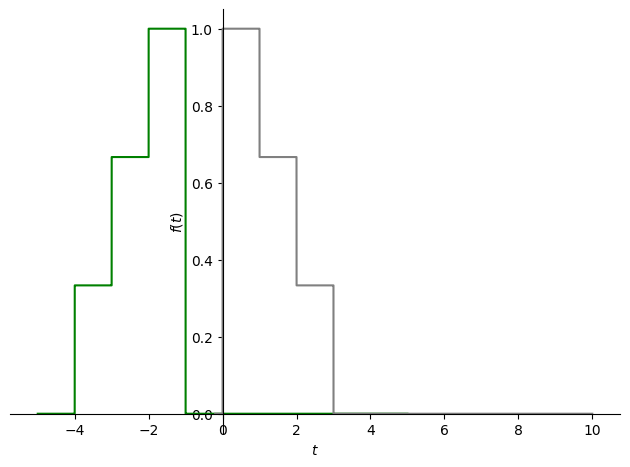

In [37]:
graph21 = sym.plot(y2.subs(tau,-1),(t,-5,5),line_color = 'green',show = False)
graph22 = sym.plot(x2,(t,-5,5),line_color = 'red',show = False)
graph21.extend(graph2)
graph21.show()

**Excercise**

* For what value $\tau$ does the flipped signal $y(t)$ start at $t=0$?


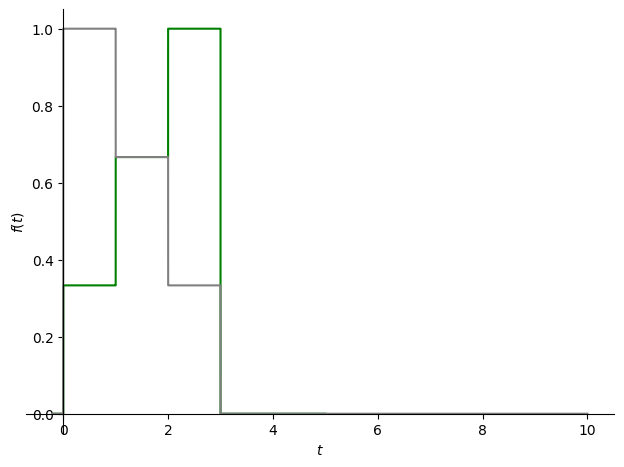

In [41]:
graph21 = sym.plot(y2.subs(tau,3),(t,-0.2,5),line_color = 'green',show = False)
graph22 = sym.plot(x2,(t,-0.2,5),line_color = 'red',show = False)
graph21.extend(graph2)
graph21.show()

Para $\tau = 0$ la función empieza en $t = 0$

* Realize the temporal flipping by splitting it into two consecutive operations: (i) time-reversal and (ii) temporal shift.

In [56]:
def time_reversal(x):
  return x.subs(t,-t)
def temporal_shift(x):
  return x.subs(t,t+tau)

In [57]:
e4i = time_reversal(x2)
e4i

θ(-t) - 0.333333333333333⋅θ(-t - 3.0) - 0.333333333333333⋅θ(-t - 2.0) - 0.3333
33333333333⋅θ(-t - 1.0)

In [58]:
e4ii = temporal_shift(x2)
e4ii

θ(t + τ) - 0.333333333333333⋅θ(t + τ - 3.0) - 0.333333333333333⋅θ(t + τ - 2.0)
 - 0.333333333333333⋅θ(t + τ - 1.0)

In [59]:
e4test = time_reversal(temporal_shift(x2))
e4test

θ(-t + τ) - 0.333333333333333⋅θ(-t + τ - 3.0) - 0.333333333333333⋅θ(-t + τ - 2
.0) - 0.333333333333333⋅θ(-t + τ - 1.0)

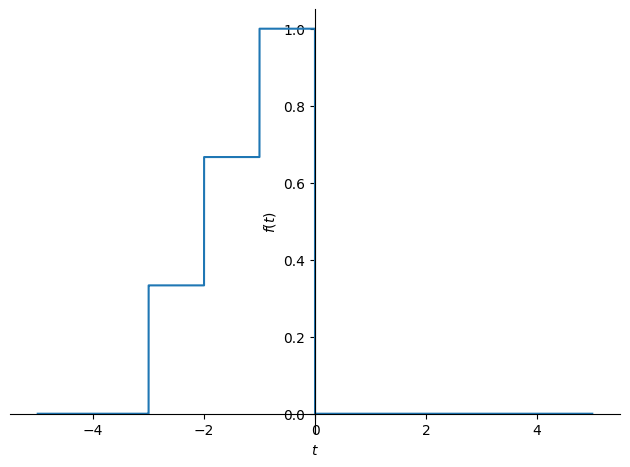

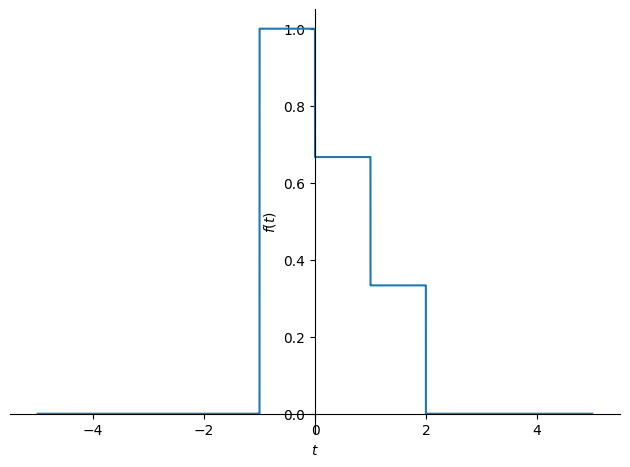

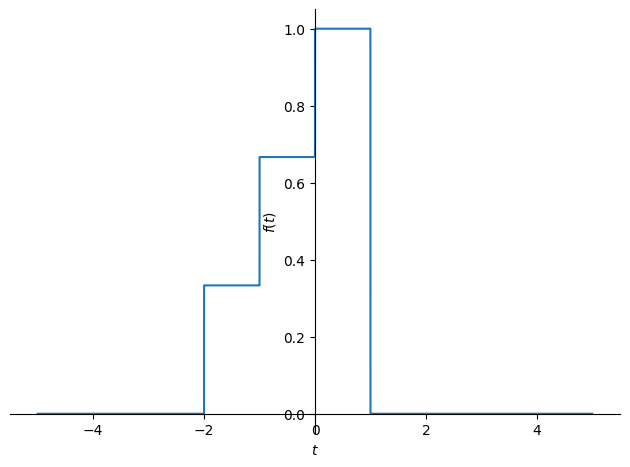

In [61]:
sym.plot(e4i,(t,-5,5))
sym.plot(e4ii.subs(tau,1),(t,-5,5))
sym.plot(e4test.subs(tau,1),(t,-5,5))